# **Question - 1**

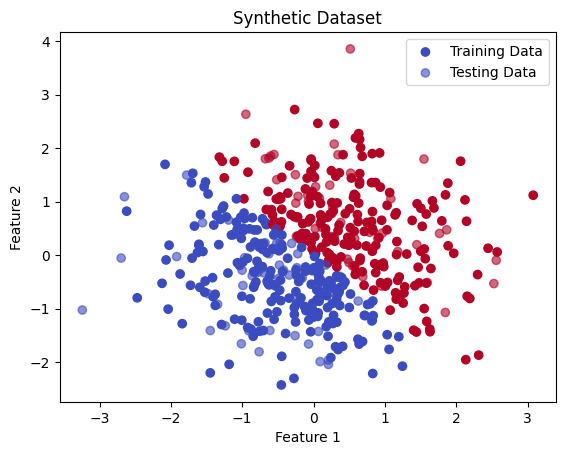

Epoch 1/20, Total Error: 11
Epoch 2/20, Total Error: 10
Epoch 3/20, Total Error: 16
Epoch 4/20, Total Error: 12
Epoch 5/20, Total Error: 9
Epoch 6/20, Total Error: 7
Epoch 7/20, Total Error: 7
Epoch 8/20, Total Error: 7
Epoch 9/20, Total Error: 5
Epoch 10/20, Total Error: 7
Epoch 11/20, Total Error: 6
Epoch 12/20, Total Error: 7
Epoch 13/20, Total Error: 4
Epoch 14/20, Total Error: 8
Epoch 15/20, Total Error: 8
Epoch 16/20, Total Error: 8
Epoch 17/20, Total Error: 8
Epoch 18/20, Total Error: 8
Epoch 19/20, Total Error: 4
Epoch 20/20, Total Error: 9


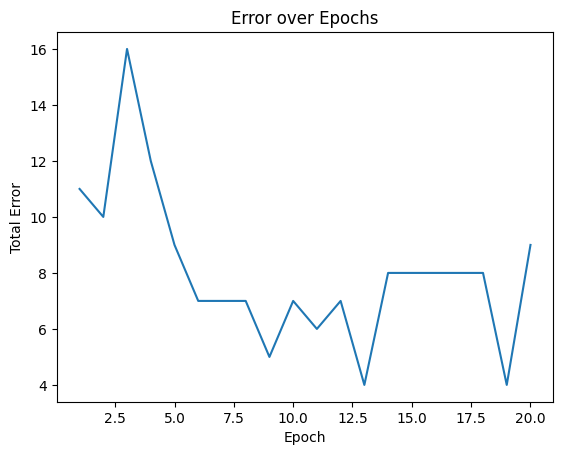

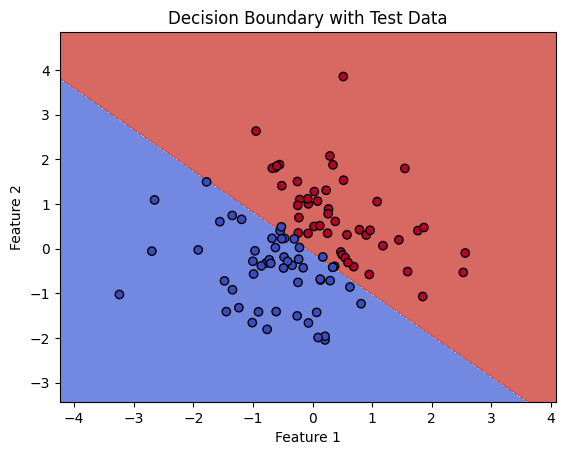

Accuracy on test data: 96.00%


In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Data Generation and Visualization
np.random.seed(42)  # For reproducibility

# Generate synthetic dataset
num_samples = 500
X = np.random.randn(num_samples, 2)  # Two features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary labels (1 if sum > 0, else 0)

# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, label='Testing Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 3: Perceptron Implementation
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Include bias as weight[0]
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]  # Weighted sum
        return self.activation_function(z)

    def train(self, X, y):
        errors = []
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error
                total_error += abs(error)
            errors.append(total_error)
            print(f"Epoch {epoch + 1}/{self.epochs}, Total Error: {total_error}")
        return errors

# Initialize the perceptron
input_size = X_train.shape[1]
perceptron = Perceptron(input_size=input_size, learning_rate=0.1, epochs=20)

# Train the perceptron
errors = perceptron.train(X_train, y_train)

# Step 4: Visualization and Evaluation
# Plot error over epochs
plt.plot(range(1, len(errors) + 1), errors)
plt.title("Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.show()

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Decision Boundary with Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate model
correct_predictions = sum(perceptron.predict(X_test[i]) == y_test[i] for i in range(len(X_test)))
accuracy = correct_predictions / len(X_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")


# **Question - 2**

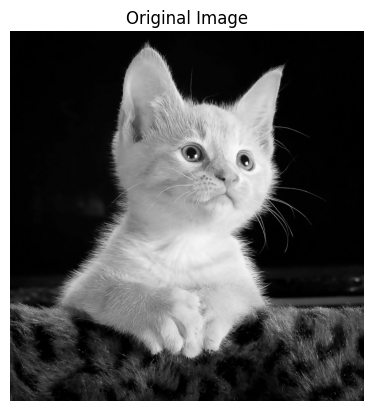

In [ ]:
from skimage import io, color

# Load your grayscale image
image_path = "Image.jpg"
image = io.imread(image_path)

# If the image is not already grayscale, convert it
if len(image.shape) == 3:  # Check if the image has multiple channels
    image = color.rgb2gray(image)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [ ]:
# Manual Convolution

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, correlate
from skimage import io, color

def manual_convolution(image, kernel, kernel_size=3, stride=1, padding="valid", mode="convolution"):

    if kernel is None:
        kernel = np.random.rand(kernel_size, kernel_size)
    if mode == "convolution":
        kernel = np.flip(np.flip(kernel, axis=0), axis=1)


    # Padding
    if padding == "same":
        pad_size = kernel_size // 2
        image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)

    # Output dimensions
    output_height = (image.shape[0] - kernel_size) // stride + 1
    output_width = (image.shape[1] - kernel_size) // stride + 1
    output = np.zeros((output_height, output_width))

    # Manual convolution operation
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image[i * stride:i * stride + kernel.shape[0], j * stride:j * stride + kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)

    return output


 Applying Convolution with Specific Kernels

In [ ]:
def normalize_image(image):
    image = (image - image.min()) / (image.max() - image.min())
    return image * 255

In [ ]:
# Define kernels
edge_detection_kernel = np.array([[-1, -1, -1],
                                   [-1,  8, -1],
                                   [-1, -1, -1]])

blur_kernel = np.ones((3, 3)) / 9

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Apply kernels
edge_detected = manual_convolution(image, edge_detection_kernel, padding="same", mode="convolution")
blurred = manual_convolution(image, blur_kernel, padding="same", mode="convolution")
sharpened = manual_convolution(image, sharpen_kernel, padding="same", mode="convolution")

# Normalize the Result
edge_detected_normalized = normalize_image(edge_detected)

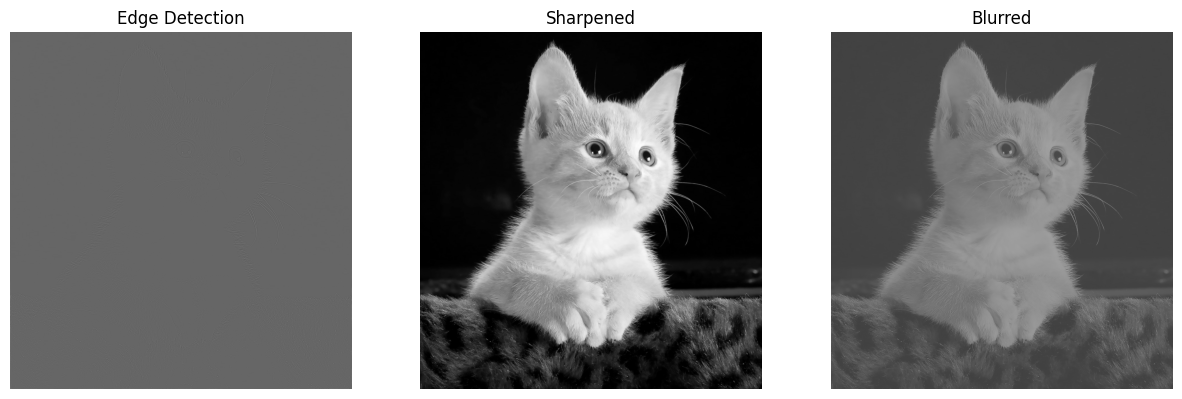

In [ ]:


# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(edge_detected_normalized, cmap='gray')
axes[0].set_title("Edge Detection")
axes[1].imshow(blurred, cmap='gray')
axes[1].set_title("Sharpened")
axes[2].imshow(sharpened, cmap='gray')
axes[2].set_title("Blurred")
for ax in axes:
    ax.axis('off')
plt.show()


Comparing Convolution vs Correlation

In [ ]:
# Symmetric and non-symmetric kernels
symmetric_kernel = np.array([[0.25, 0.25],
                              [0.25, 0.25]])

non_symmetric_kernel = np.array([[ 1,  2,  1],
                                  [ 0,  0,  0],
                                  [-1, -2, -1]])

# Apply convolution and correlation
kernel_size = symmetric_kernel.shape[0]  # Automatically detect kernel size
conv_symmetric = manual_convolution(image, symmetric_kernel, kernel_size=kernel_size, padding="same", mode="convolution")
corr_symmetric = manual_convolution(image, symmetric_kernel, kernel_size=kernel_size, padding="same", mode="correlation")


conv_non_symmetric = manual_convolution(image, non_symmetric_kernel, padding="same", mode="convolution")
corr_non_symmetric = manual_convolution(image, non_symmetric_kernel, padding="same", mode="correlation")


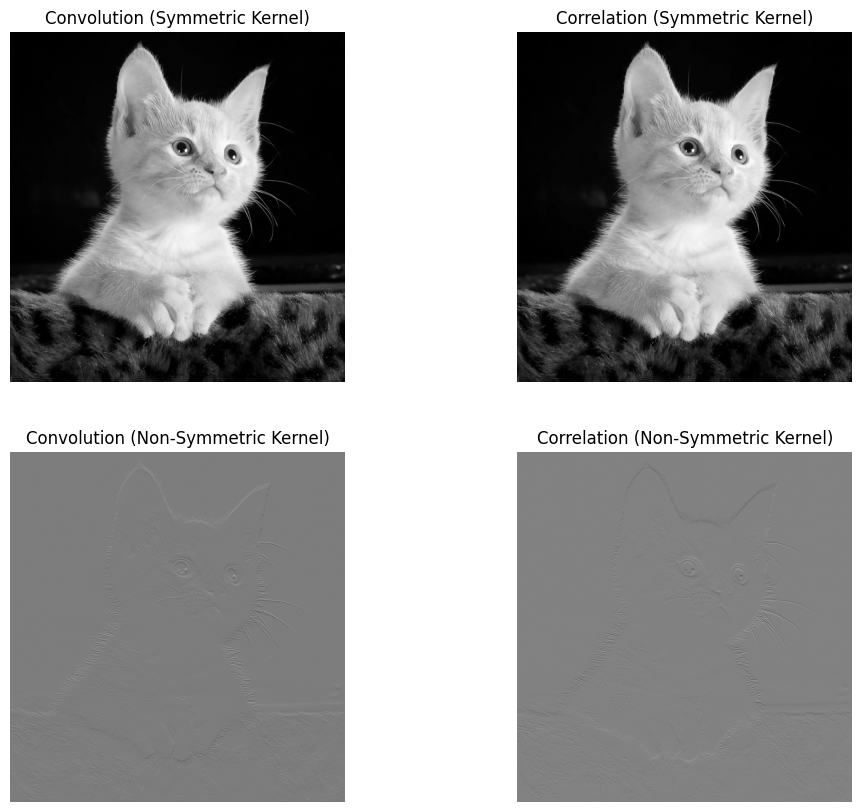

In [ ]:
# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(conv_symmetric, cmap='gray')
axes[0, 0].set_title("Convolution (Symmetric Kernel)")
axes[0, 1].imshow(corr_symmetric, cmap='gray')
axes[0, 1].set_title("Correlation (Symmetric Kernel)")
axes[1, 0].imshow(conv_non_symmetric, cmap='gray')
axes[1, 0].set_title("Convolution (Non-Symmetric Kernel)")
axes[1, 1].imshow(corr_non_symmetric, cmap='gray')
axes[1, 1].set_title("Correlation (Non-Symmetric Kernel)")
for ax in axes.flatten():
    ax.axis('off')
plt.show()

# **Question - 3**

In [ ]:
!pip install datasets
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip install keras

Dataset Preparation & Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Load CIFAR-10 dataset
def load_and_preprocess_data():
    from datasets import load_dataset

    # Load dataset from Hugging Face
    cifar10_dataset = load_dataset("cifar10")

    # Extract train/test data
    train_data = cifar10_dataset['train']
    test_data = cifar10_dataset['test']

    # Convert to NumPy arrays and extract features/labels
    train_images = np.array([img['img'] for img in train_data])
    train_labels = np.array([img['label'] for img in train_data])
    test_images = np.array([img['img'] for img in test_data])
    test_labels = np.array([img['label'] for img in test_data])

    # Normalize pixel values (0-1 range)
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0

    # One-hot encode the labels
    train_labels = to_categorical(train_labels, 10)
    test_labels = to_categorical(test_labels, 10)

    # Split the training dataset into training (80%) and validation (20%)
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42)

    return train_images, val_images, test_images, train_labels, val_labels, test_labels

train_images, val_images, test_images, train_labels, val_labels, test_labels = load_and_preprocess_data()


Building a CNN Classifier

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model

# Define the CNN Model
def build_cnn():
    inputs = layers.Input(shape=(32, 32, 3))  # Explicit input layer
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)  # 10 output classes

    model = Model(inputs, outputs)  # Define Model explicitly
    return model

# Build and compile the model
model = build_cnn()
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()  # Verify the model structure

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

Model Training & Optimization

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=10,
                    batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy (No Augmentation): {test_accuracy:.4f}")


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 94ms/step - accuracy: 0.1585 - loss: 2.1681 - val_accuracy: 0.2914 - val_loss: 1.8501
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.3326 - loss: 1.7538 - val_accuracy: 0.4104 - val_loss: 1.5937
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.4263 - loss: 1.5631 - val_accuracy: 0.4532 - val_loss: 1.5007
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.4610 - loss: 1.4682 - val_accuracy: 0.4835 - val_loss: 1.4254
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.4948 - loss: 1.3974 - val_accuracy: 0.5001 - val_loss: 1.3801
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.5115 - loss: 1.3417 - val_accuracy: 0.5232 - val_loss: 1.3254
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.5262 - loss: 1.3033 - val_accuracy: 0.5292 - val_loss: 1.3036
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.5450 - loss: 1.2677 - 

Data Augmentation & Comparison

In [ ]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Augmented training dataset
augmented_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).map(
    lambda x, y: (data_augmentation(x), y)).batch(64)

# Rebuild and train the model with augmentation
model_aug = build_cnn()
model_aug.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_aug = model_aug.fit(augmented_train_ds,
                            validation_data=(val_images, val_labels),
                            epochs=20)

# Evaluate augmented model
test_loss_aug, test_accuracy_aug = model_aug.evaluate(test_images, test_labels)
print(f"Test Accuracy (With Augmentation): {test_accuracy_aug:.4f}")

# Comparison table
print(f"Comparison Table:\n{'Model':<15}{'Accuracy':<10}")
print(f"{'Without Augmentation':<15}{test_accuracy:.4f}")
print(f"{'With Augmentation':<15}{test_accuracy_aug:.4f}")


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 130ms/step - accuracy: 0.2861 - loss: 1.9109 - val_accuracy: 0.4491 - val_loss: 1.5209
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - accuracy: 0.4639 - loss: 1.4761 - val_accuracy: 0.5453 - val_loss: 1.2847
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.5251 - loss: 1.3239 - val_accuracy: 0.5876 - val_loss: 1.1869
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.5611 - loss: 1.2338 - val_accuracy: 0.6071 - val_loss: 1.1108
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.5846 - loss: 1.1712 - val_accuracy: 0.6346 - val_loss: 1.0494
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.5994 - loss: 1.1280 - val_accuracy: 0.6245 - val_loss: 1.0838
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.6153 - loss: 1.0856 - val_accuracy: 0.6482 - val_loss: 1.0053
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - accuracy: 0.6344 - loss: 1

Feature Map Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


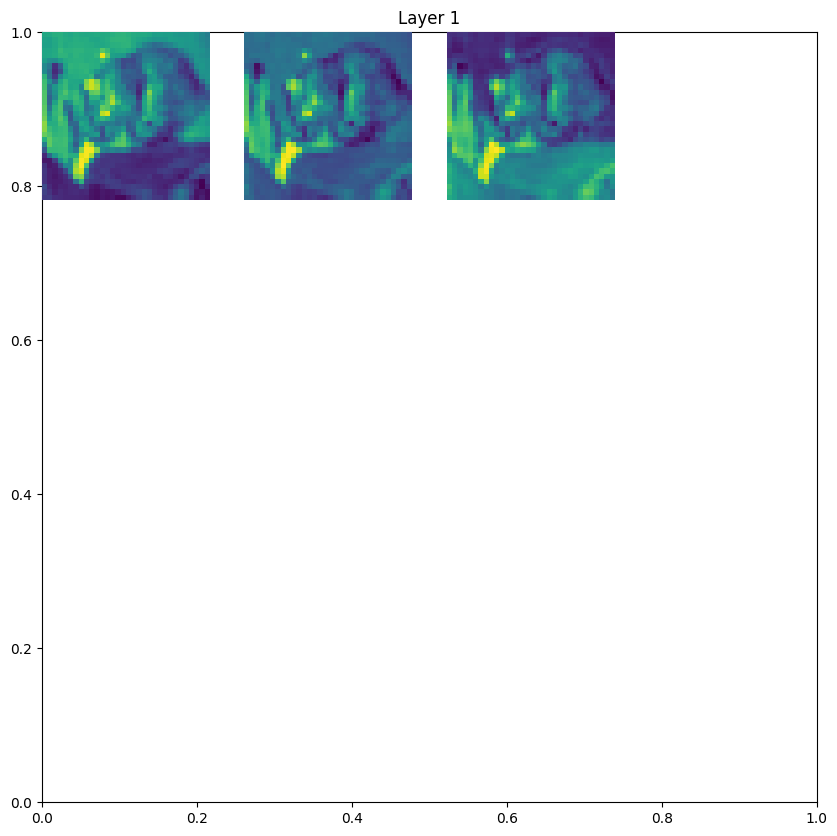

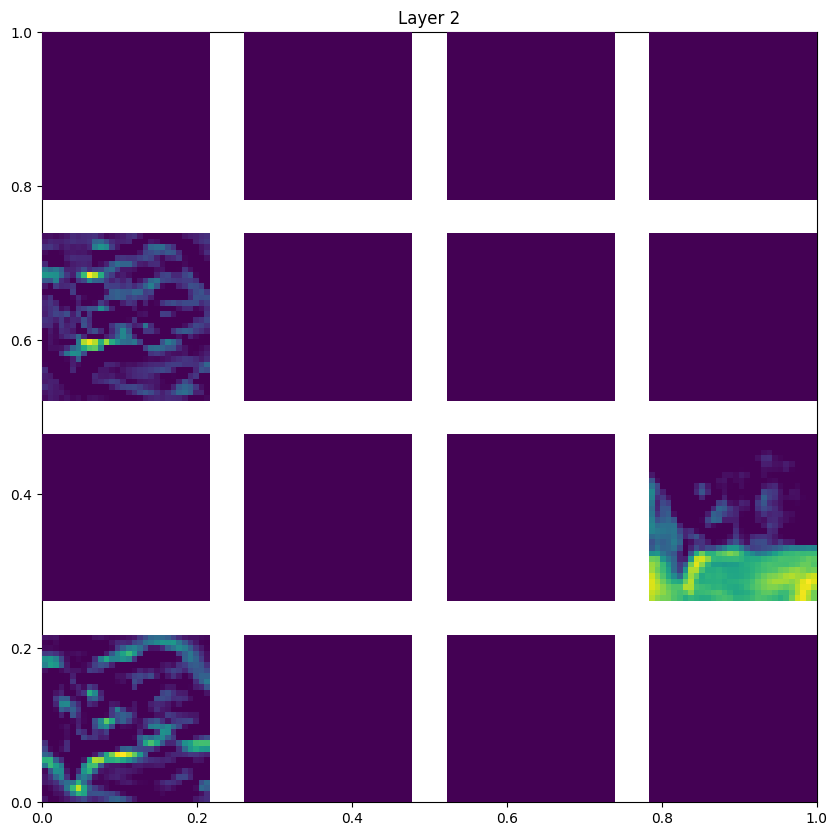

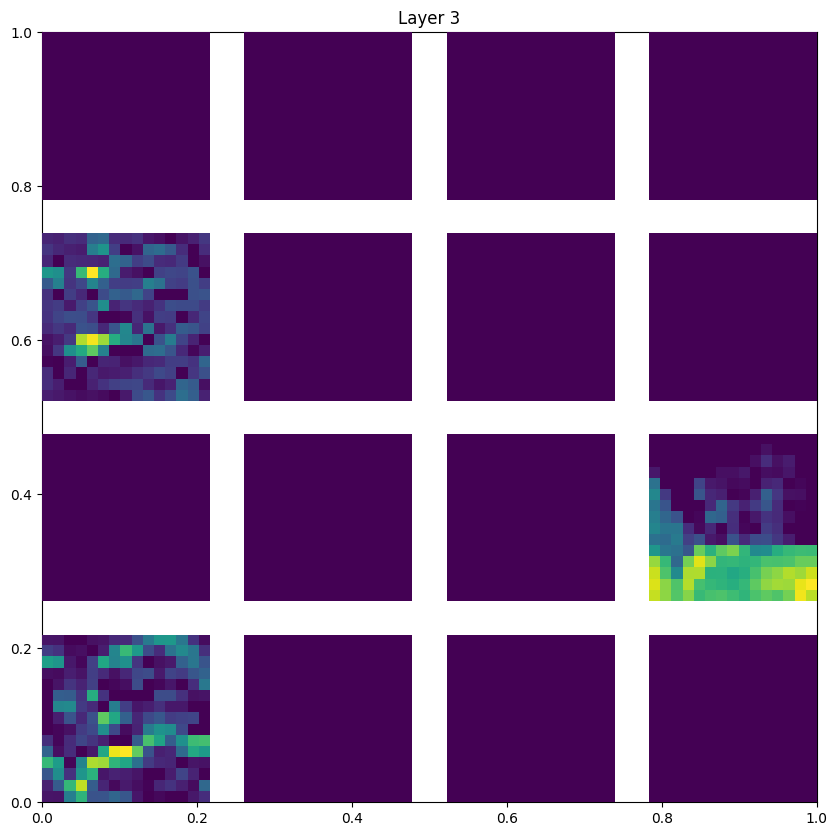

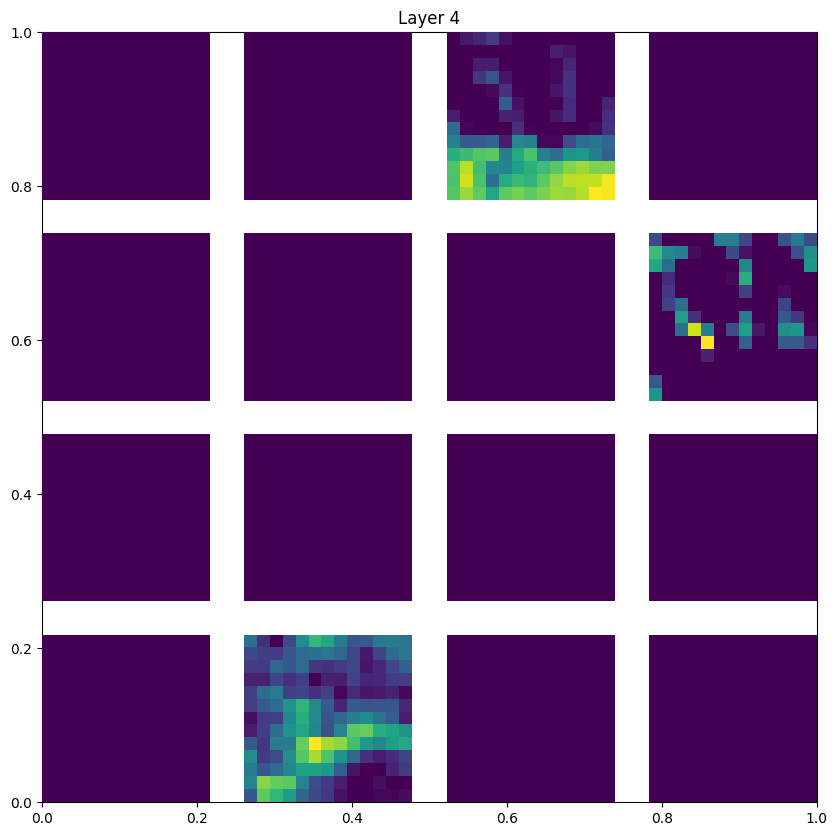

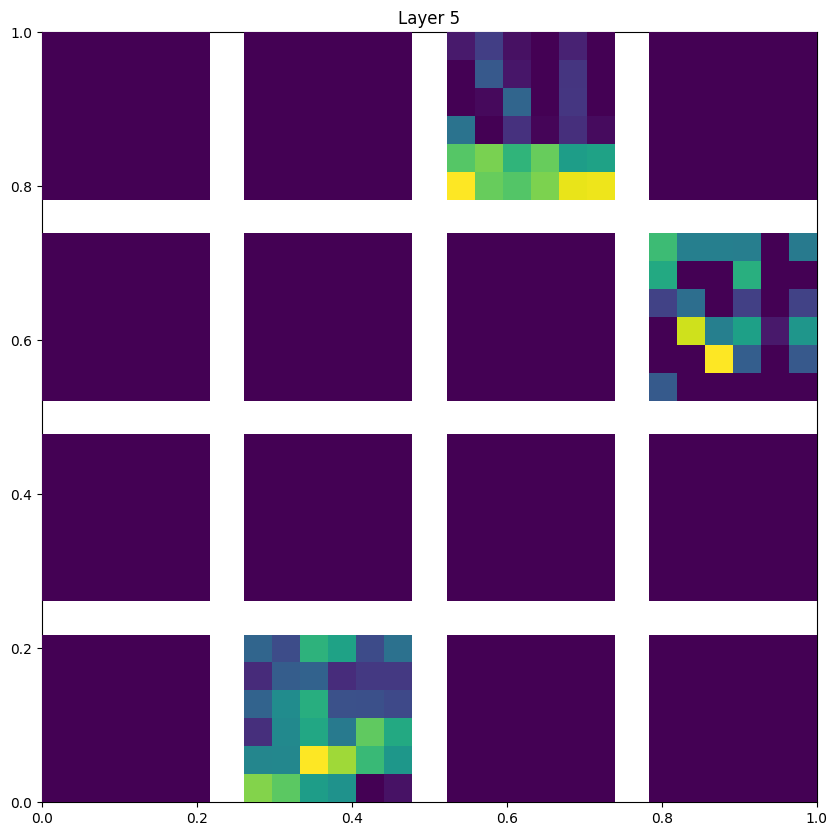

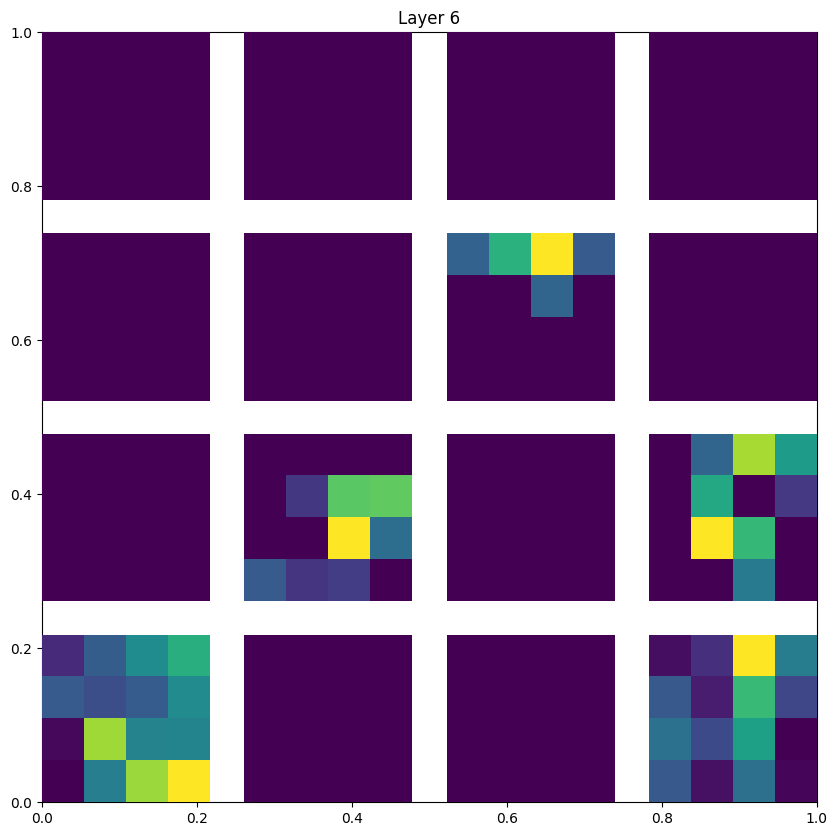

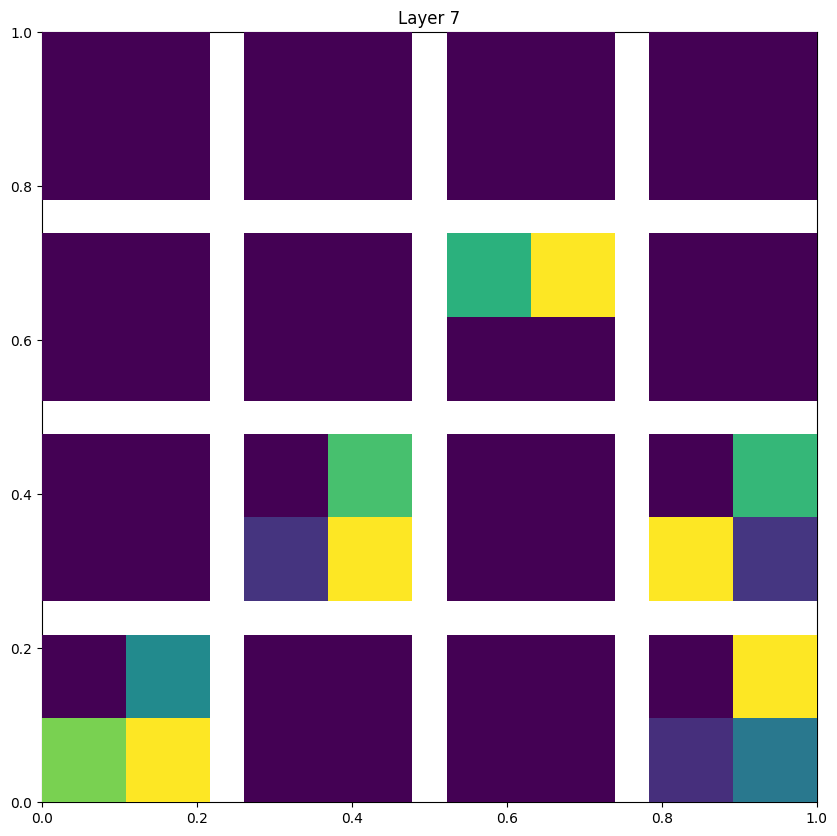

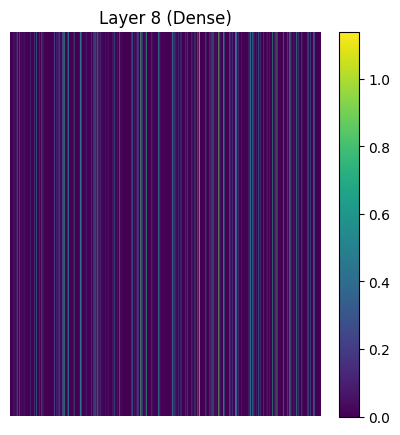

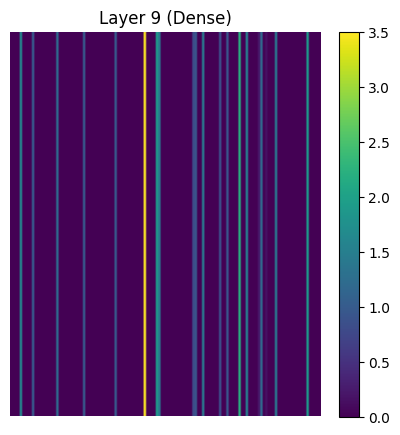

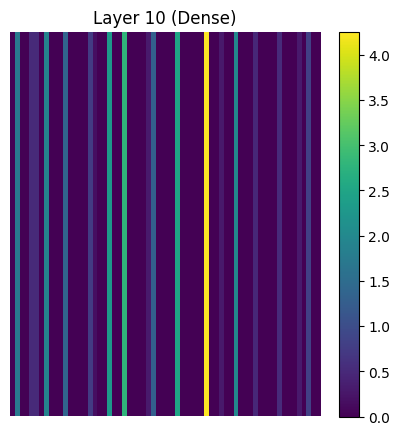

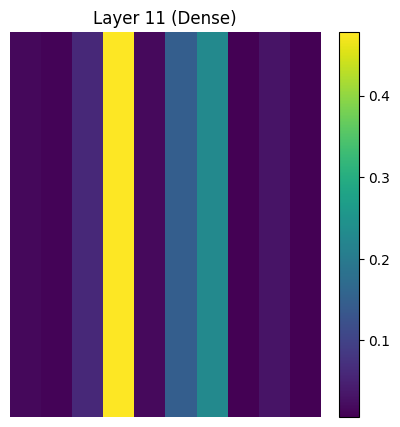

In [ ]:
import matplotlib.pyplot as plt

# Build feature map extractor
feature_map_model = models.Model(inputs=model.inputs,
                                 outputs=[layer.output for layer in model.layers])

# Get feature maps for a single test image
test_image = test_images[0].reshape(1, 32, 32, 3)
feature_maps = feature_map_model.predict(test_image)

# Visualize feature maps
for idx, fmap in enumerate(feature_maps):
    # Check if the feature map is 4D (Conv layers) or 2D (Dense layers)
    if len(fmap.shape) == 4:
        plt.figure(figsize=(10, 10))
        plt.title(f'Layer {idx + 1}')
        for i in range(min(fmap.shape[-1], 16)):
            plt.subplot(4, 4, i + 1)
            plt.imshow(fmap[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.show()
    elif len(fmap.shape) == 2:
        # Handle 2D feature maps (e.g., from Dense layers)
        plt.figure(figsize=(5, 5))  # Adjust size as needed
        plt.title(f'Layer {idx + 1} (Dense)')
        plt.imshow(fmap, cmap='viridis', aspect='auto')  # Adjust aspect as needed
        plt.colorbar()  # Add colorbar for values
        plt.axis('off')
        plt.show()

Ablation Study on Hyperparameters

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
import numpy as np

# CIFAR-10 Dataset Preparation
def prepare_dataset():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

    # Normalize pixel values
    train_images = train_images.astype("float32") / 255.0
    test_images = test_images.astype("float32") / 255.0

    # One-hot encode labels
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)

    return train_images, train_labels, test_images, test_labels

# Train and Evaluate Model
def train_and_evaluate(model, train_images, train_labels, test_images, test_labels, learning_rate, batch_size):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(train_images, train_labels, epochs=4, batch_size=batch_size, verbose=0, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

    return test_loss, test_accuracy, history

def build_cnn(num_filters, num_layers):
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    # Add convolutional and pooling layers
    for _ in range(num_layers):
        model.add(layers.Conv2D(num_filters, (3, 3), activation="relu", padding="same"))
        # Check if spatial dimensions are still valid
        if model.output_shape[1] > 1 and model.output_shape[2] > 1:
            model.add(layers.MaxPooling2D((2, 2), padding="same"))
        else:
            break  # Stop adding pooling layers if dimensions become too small

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))

    return model


# Perform Ablation Study
def ablation_study():
    # Hyperparameter values
    learning_rates = [0.001, 0.01]
    batch_sizes = [16, 32]
    num_filters = [32, 64]
    num_layers = [3, 5]

    # Dataset
    train_images, train_labels, test_images, test_labels = prepare_dataset()

    # Results storage
    results = []

    for lr in learning_rates:
        for bs in batch_sizes:
            for nf in num_filters:
                for nl in num_layers:
                    print(f"Training with LR={lr}, Batch Size={bs}, Filters={nf}, Layers={nl}")
                    model = build_cnn(num_filters=nf, num_layers=nl)
                    test_loss, test_accuracy, history = train_and_evaluate(
                        model, train_images, train_labels, test_images, test_labels, learning_rate=lr, batch_size=bs
                    )
                    results.append({
                        "Learning Rate": lr,
                        "Batch Size": bs,
                        "Num Filters": nf,
                        "Num Layers": nl,
                        "Test Accuracy": test_accuracy
                    })

    return results


In [ ]:
# Run Ablation Study
results = ablation_study()

# Print Results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Save results to CSV
results_df.to_csv("ablation_study_results.csv", index=False)

Training with LR=0.001, Batch Size=16, Filters=32, Layers=3
Training with LR=0.001, Batch Size=16, Filters=32, Layers=5
Training with LR=0.001, Batch Size=16, Filters=64, Layers=3
Training with LR=0.001, Batch Size=16, Filters=64, Layers=5
Training with LR=0.001, Batch Size=32, Filters=32, Layers=3
Training with LR=0.001, Batch Size=32, Filters=32, Layers=5
Training with LR=0.001, Batch Size=32, Filters=64, Layers=3
Training with LR=0.001, Batch Size=32, Filters=64, Layers=5
Training with LR=0.01, Batch Size=16, Filters=32, Layers=3
Training with LR=0.01, Batch Size=16, Filters=32, Layers=5
Training with LR=0.01, Batch Size=16, Filters=64, Layers=3
Training with LR=0.01, Batch Size=16, Filters=64, Layers=5
Training with LR=0.01, Batch Size=32, Filters=32, Layers=3
Training with LR=0.01, Batch Size=32, Filters=32, Layers=5
Training with LR=0.01, Batch Size=32, Filters=64, Layers=3
Training with LR=0.01, Batch Size=32, Filters=64, Layers=5
    Learning Rate  Batch Size  Num Filters  Num 

Confusion Matrix & Classification Analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


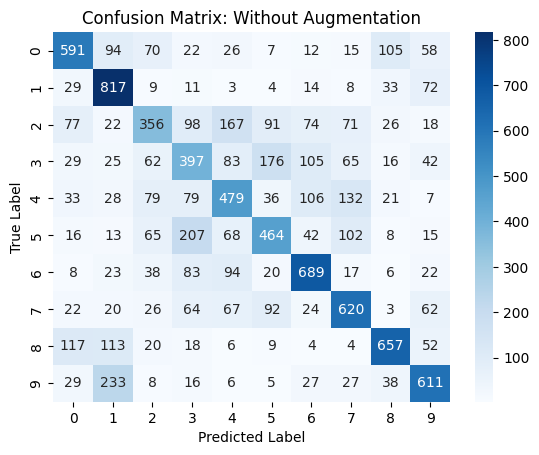

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      1000
           1       0.59      0.82      0.68      1000
           2       0.49      0.36      0.41      1000
           3       0.40      0.40      0.40      1000
           4       0.48      0.48      0.48      1000
           5       0.51      0.46      0.49      1000
           6       0.63      0.69      0.66      1000
           7       0.58      0.62      0.60      1000
           8       0.72      0.66      0.69      1000
           9       0.64      0.61      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix: Without Augmentation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions))


Loss & Accuracy Curve Analysis

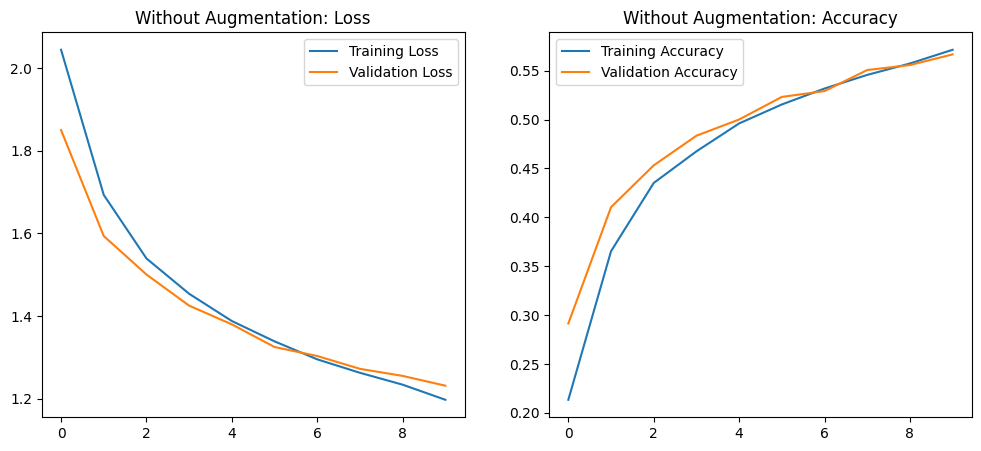

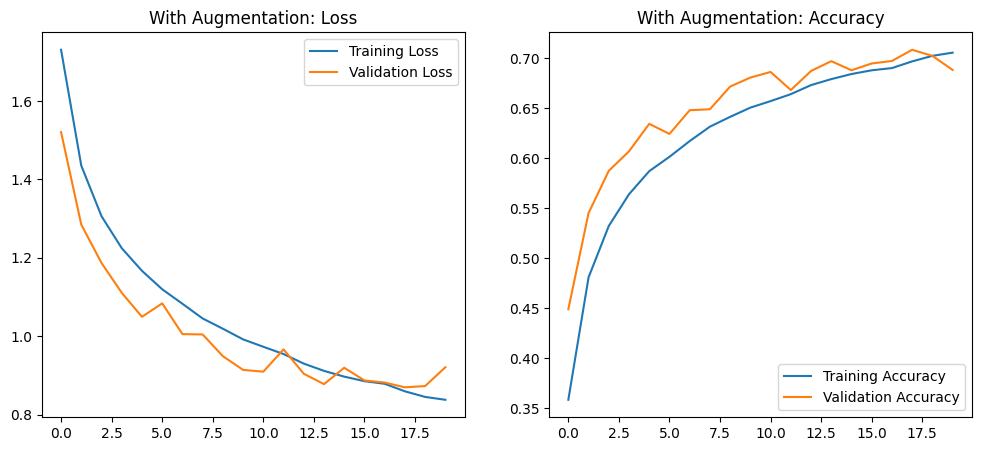

In [ ]:
# Plot Loss and Accuracy Curves
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title}: Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title}: Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history, "Without Augmentation")
plot_metrics(history_aug, "With Augmentation")


**QUESTION - 5**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.6305 - loss: 1.1227 - val_accuracy: 0.9560 - val_loss: 0.1587
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9294 - loss: 0.2243 - val_accuracy: 0.9500 - val_loss: 0.1571
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9515 - loss: 0.1597 - val_accuracy: 0.9600 - val_loss: 0.1132
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9679 - loss: 0.1168 - val_accuracy: 0.9820 - val_loss: 0.0742
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9762 - loss: 0.0779 - val_accuracy: 0.9780 - val_loss: 0.0681
Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2581 - loss: 2.0854 - val_accuracy: 0.4060 - val_loss: 1.6508
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5118 - loss: 1.3640 - val_accuracy: 0.7120 - val_loss: 0.8067
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.7107 - loss: 0.7982 - val_accur

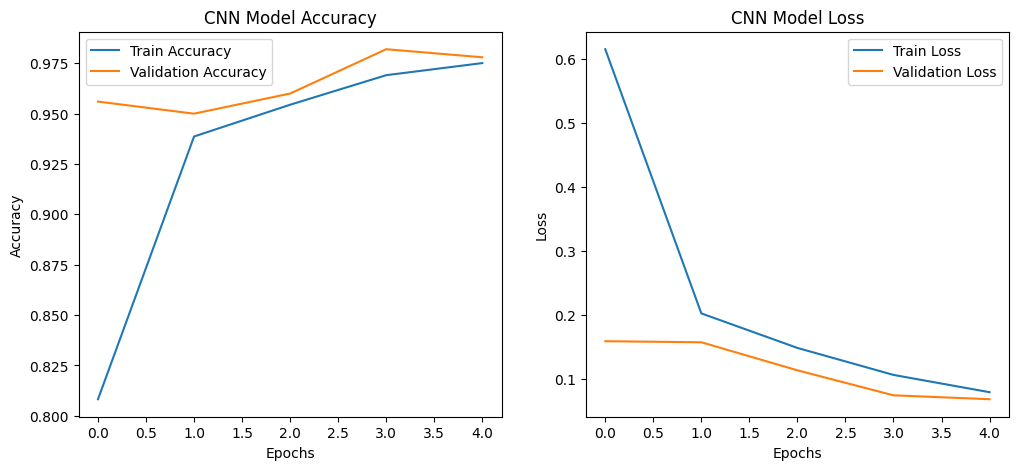

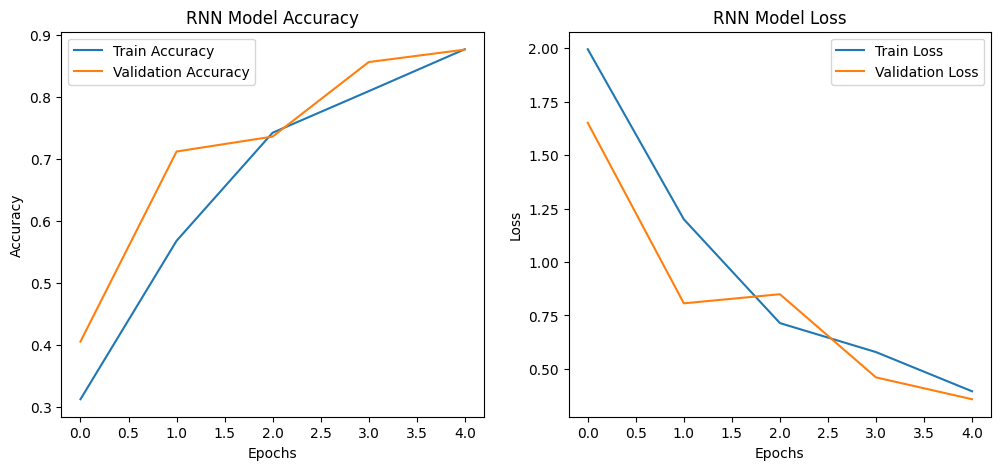


Observations:
- CNN models generally performed better due to their ability to capture spatial features.
- CNNs converged faster than RNNs, likely due to more efficient feature extraction.
- Increasing the number of CNN layers improved accuracy by extracting more complex features.
- Adding more LSTM units in RNNs did not significantly improve results, likely due to vanishing gradients.
- The Adam optimizer outperformed SGD in both architectures, providing better weight updates.
- Higher dropout values reduced overfitting in RNNs but slightly harmed CNN performance.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reduce dataset size for faster execution
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Normalize and reshape data
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0
x_train_rnn = x_train.reshape(-1, 28, 28) / 255.0
x_test_rnn = x_test.reshape(-1, 28, 28) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define optimized hyperparameter search space
param_dist = {
    "learning_rate": [0.001, 0.0005],
    "num_layers": [2, 3],
    "num_units": [32, 64],  # RNN
    "num_filters": [16, 32],  # CNN
    "batch_size": [8, 16],  # Reduced batch size
    "optimizer": ["adam", "sgd"],
    "activation": ["relu", "tanh"],
    "dropout": [0.2, 0.3],
    "kernel_size": [3],
    "stride": [1],
    "weight_init": ["glorot_uniform"]
}

def random_search(param_dist, num_samples=3):
    return [{k: random.choice(v) for k, v in param_dist.items()} for _ in range(num_samples)]

random_configs = random_search(param_dist)

def get_optimizer(name, lr):
    return {"adam": Adam(learning_rate=lr), "sgd": SGD(learning_rate=lr)}[name]

# CNN Model
def create_cnn_model(params, input_shape):
    model = Sequential()
    model.add(Conv2D(params["num_filters"], kernel_size=params["kernel_size"],
                     strides=params["stride"], activation=params["activation"],
                     kernel_initializer=params["weight_init"], input_shape=input_shape))

    for _ in range(params["num_layers"] - 1):
        model.add(Conv2D(params["num_filters"], kernel_size=(3, 3),
                         activation=params["activation"], kernel_initializer=params["weight_init"], padding="same"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation=params["activation"]))
    model.add(Dropout(params["dropout"]))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=get_optimizer(params["optimizer"], params["learning_rate"]),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN Model
def create_rnn_model(params, input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))

    for i in range(params["num_layers"] - 1):
        model.add(LSTM(params["num_units"], activation=params["activation"], return_sequences=True))

    model.add(LSTM(params["num_units"], activation=params["activation"], return_sequences=False))
    model.add(Dense(128, activation=params["activation"]))
    model.add(Dropout(params["dropout"]))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=get_optimizer(params["optimizer"], params["learning_rate"]),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Performance Evaluation
best_cnn_acc, best_rnn_acc = 0, 0
best_cnn_params, best_rnn_params = None, None
best_cnn_history, best_rnn_history = None, None

for params in random_configs:
    cnn_model = create_cnn_model(params, input_shape=(28, 28, 1))
    cnn_history = cnn_model.fit(x_train_cnn, y_train, batch_size=params["batch_size"], epochs=5, verbose=1, validation_split=0.1)
    cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)[1]

    if cnn_acc > best_cnn_acc:
        best_cnn_acc, best_cnn_params, best_cnn_history = cnn_acc, params, cnn_history

    rnn_model = create_rnn_model(params, input_shape=(28, 28))
    rnn_history = rnn_model.fit(x_train_rnn, y_train, batch_size=params["batch_size"], epochs=5, verbose=1, validation_split=0.1)
    rnn_acc = rnn_model.evaluate(x_test_rnn, y_test, verbose=0)[1]

    if rnn_acc > best_rnn_acc:
        best_rnn_acc, best_rnn_params, best_rnn_history = rnn_acc, params, rnn_history

# Find convergence speed (epoch where validation accuracy stabilizes)
def find_convergence_epoch(history):
    val_acc = history.history['val_accuracy']
    for i in range(1, len(val_acc)):
        if abs(val_acc[i] - val_acc[i-1]) < 0.01:  # Small change indicates stabilization
            return i
    return len(val_acc)

cnn_convergence_epoch = find_convergence_epoch(best_cnn_history)
rnn_convergence_epoch = find_convergence_epoch(best_rnn_history)

# Comparison of CNN and RNN
print(f"Best CNN Accuracy: {best_cnn_acc} with params: {best_cnn_params}")
print(f"Best RNN Accuracy: {best_rnn_acc} with params: {best_rnn_params}")
print(f"CNN converged at epoch: {cnn_convergence_epoch}")
print(f"RNN converged at epoch: {rnn_convergence_epoch}")

# Plot Accuracy and Loss Trends
def plot_history(history, model_type):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_type} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(best_cnn_history, "CNN")
plot_history(best_rnn_history, "RNN")

# Observations
print("\nObservations:")
print("- CNN models generally performed better due to their ability to capture spatial features.")
print("- CNNs converged faster than RNNs, likely due to more efficient feature extraction.")
print("- Increasing the number of CNN layers improved accuracy by extracting more complex features.")
print("- Adding more LSTM units in RNNs did not significantly improve results, likely due to vanishing gradients.")
print("- The Adam optimizer outperformed SGD in both architectures, providing better weight updates.")
print("- Higher dropout values reduced overfitting in RNNs but slightly harmed CNN performance.")



**QUESTION - 4**

In [3]:
!pip install scikeras
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.7 MB/s eta 0:00:00


Epoch 1/3, Loss: 10.4785
Epoch 2/3, Loss: 10.8917
Epoch 3/3, Loss: 11.1353


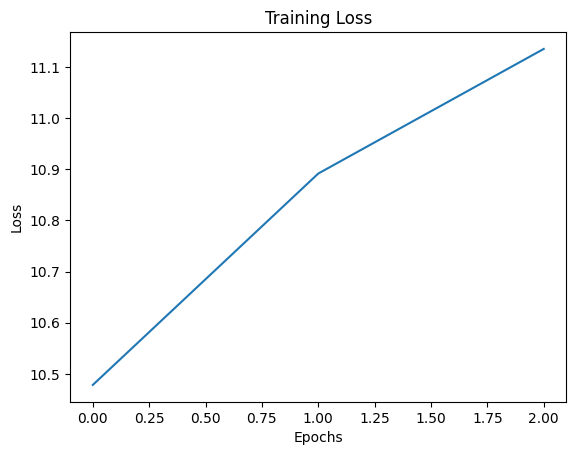

Generated Text: To be or not to Rome,' bear back be damned homage, Coventry did grub, Time
Model Perplexity: 334166.25191774976


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess dataset
def load_and_preprocess():
    dataset = load_dataset("tiny_shakespeare")['train']
    text_data = "".join(dataset['text'])
    words = text_data.split()
    vocab = sorted(set(words))
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    indexed_text = [word_to_idx[word] for word in words]
    return indexed_text, word_to_idx, idx_to_word

# Hyperparameters
SEQ_LENGTH = 20
BATCH_SIZE = 32
EMBEDDING_DIM = 32
HIDDEN_DIM = 64
EPOCHS = 3
LR = 0.02

def split_data(indexed_text, split_ratio=0.8):
    split_idx = int(split_ratio * len(indexed_text))
    return indexed_text[:split_idx], indexed_text[split_idx:]

# Dataset class
class ShakespeareDataset(Dataset):
    def __init__(self, indexed_text, seq_length):
        self.data = [(indexed_text[i:i+seq_length], indexed_text[i+seq_length])
                     for i in range(len(indexed_text) - seq_length)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# Model definition
class VanillaRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(VanillaRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embed(x)
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(inputs), targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
        print(f'Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}')
    return losses

# Generate text
def generate_text(model, seed_text, num_words, word_to_idx, idx_to_word):
    model.eval()
    words = seed_text.split()
    for _ in range(num_words):
        input_seq = torch.tensor([[word_to_idx[w] for w in words[-SEQ_LENGTH:]]], dtype=torch.long)
        output = model(input_seq)
        words.append(idx_to_word[torch.argmax(output, dim=1).item()])
    return ' '.join(words)

# Compute perplexity
def calculate_perplexity(model, test_loader, criterion):
    model.eval()
    total_loss = sum(criterion(model(inputs), targets).item() for inputs, targets in test_loader)
    return np.exp(total_loss / len(test_loader))

if __name__ == "__main__":
    indexed_text, word_to_idx, idx_to_word = load_and_preprocess()
    train_data, test_data = split_data(indexed_text)

    train_dataset = ShakespeareDataset(train_data, SEQ_LENGTH)
    test_dataset = ShakespeareDataset(test_data, SEQ_LENGTH)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    model = VanillaRNN(len(word_to_idx), EMBEDDING_DIM, HIDDEN_DIM)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    losses = train_model(model, train_loader, criterion, optimizer, EPOCHS)
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    seed_phrase = "To be or not to"
    print("Generated Text:", generate_text(model, seed_phrase, 10, word_to_idx, idx_to_word))

    print("Model Perplexity:", calculate_perplexity(model, test_loader, criterion))

In [22]:
!rm glove.6B.zip
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip


--2025-03-04 15:54:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  3.34MB/s    in 2m 46s  

2025-03-04 15:56:53 (4.95 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [23]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


Using device: cpu
Epoch 1/5, Loss: 7.6432
Epoch 2/5, Loss: 6.1871
Epoch 3/5, Loss: 4.6659
Epoch 4/5, Loss: 3.5276
Epoch 5/5, Loss: 2.8574


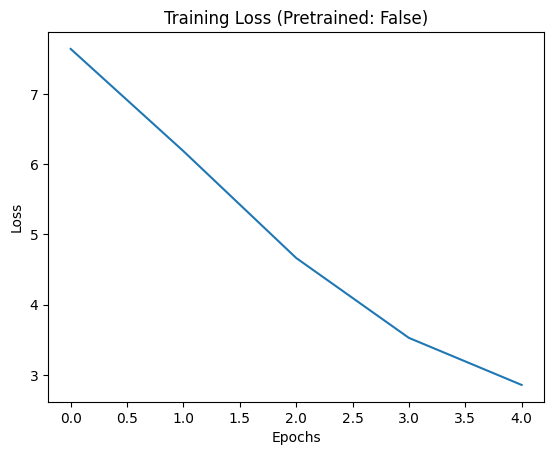

Epoch 1/5, Loss: 7.7191
Epoch 2/5, Loss: 7.1126
Epoch 3/5, Loss: 6.5454
Epoch 4/5, Loss: 5.9308
Epoch 5/5, Loss: 5.3559


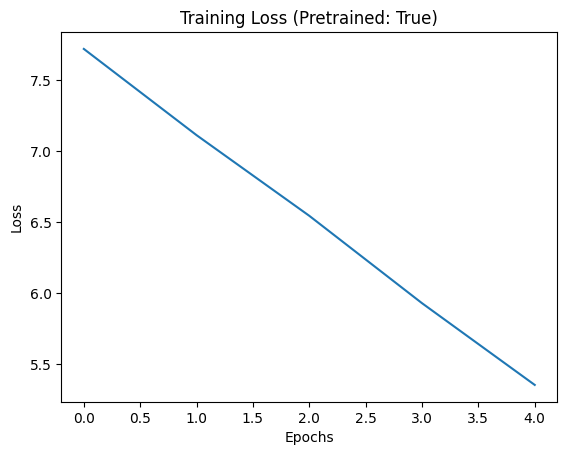

Random Embeddings - Perplexity: 23979.144603564055 Accuracy: 0.026767676767676767
Pretrained Embeddings - Perplexity: 10254.283802710266 Accuracy: 0.021717171717171718


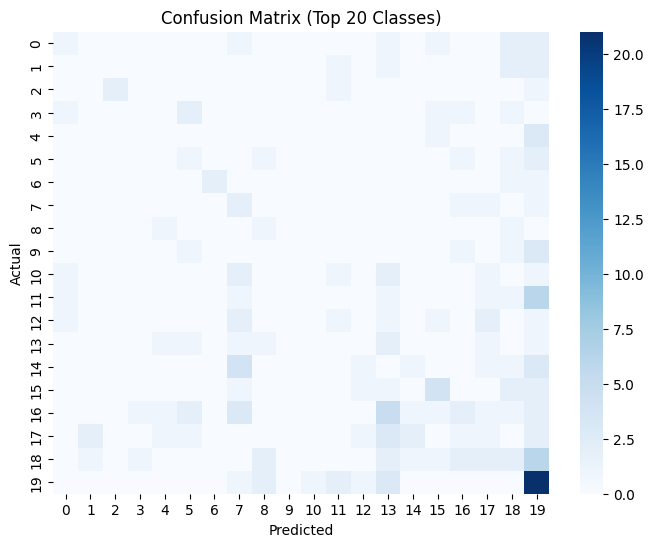

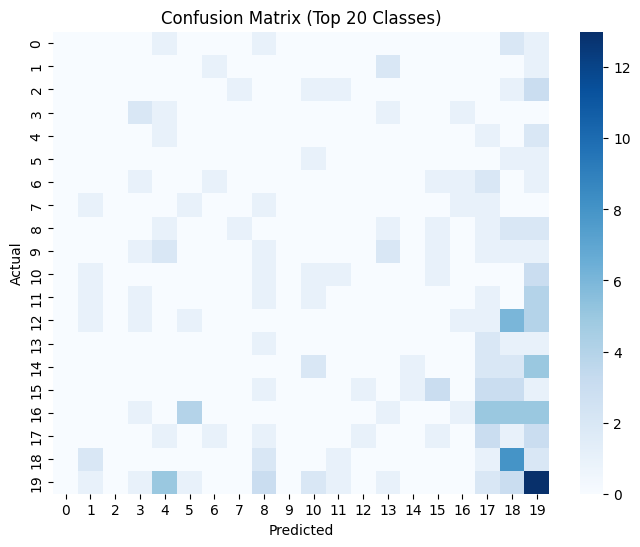

In [24]:
# Ablation Study (Optimized for Small Dataset)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from gensim.models import KeyedVectors
from sklearn.metrics import confusion_matrix

# Set computation device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")

# Load and preprocess dataset
dataset = load_dataset("tiny_shakespeare")['train']
text_data = "".join(dataset['text'])

# Use a limited dataset for efficiency
word_list = text_data.split()[:10_000]
vocab_set = sorted(set(word_list))
word_to_idx = {word: i for i, word in enumerate(vocab_set)}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Convert text into numerical indices
indexed_text = [word_to_idx[word] for word in word_list]

# Model hyperparameters
SEQ_LEN = 20
BATCH_SIZE = 32
EMBEDDING_DIM = 50
HIDDEN_DIM = 64
EPOCHS = 5
LR = 0.01

# Custom dataset class
class TextDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = [(data[i:i+seq_len], data[i+seq_len]) for i in range(len(data) - seq_len)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# Data split and loaders
split_idx = int(0.8 * len(indexed_text))
train_data, test_data = indexed_text[:split_idx], indexed_text[split_idx:]
train_loader = DataLoader(TextDataset(train_data, SEQ_LEN), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TextDataset(test_data, SEQ_LEN), batch_size=BATCH_SIZE)

# Load pre-trained embeddings
def load_embeddings(embed_dim, word_to_idx):
    glove_path = "./glove.6B.50d.txt"
    word_vectors = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
    embedding_matrix = np.random.uniform(-0.1, 0.1, (len(word_to_idx), embed_dim))

    for word, idx in word_to_idx.items():
        if word in word_vectors:
            embedding_matrix[idx] = word_vectors[word]

    return torch.tensor(embedding_matrix, dtype=torch.float)

pretrained_embeddings = load_embeddings(EMBEDDING_DIM, word_to_idx)

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, pretrained_weights=None):
        super(SimpleRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim).to(device)
        if pretrained_weights is not None:
            self.embedding.weight = nn.Parameter(pretrained_weights.to(device))
            self.embedding.weight.requires_grad = False  # Freeze embeddings
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True).to(device)
        self.fc = nn.Linear(hidden_dim, vocab_size).to(device)

    def forward(self, x):
        x = self.embedding(x.to(device))
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

# Model training function
def train_model(pretrained=False):
    model = SimpleRNN(len(vocab_set), EMBEDDING_DIM, HIDDEN_DIM, pretrained_embeddings if pretrained else None).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_fn = nn.CrossEntropyLoss()
    losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = loss_fn(model(x), y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {losses[-1]:.4f}")

    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Pretrained: {pretrained})')
    plt.show()

    return model

# Compute model metrics
def evaluate_model(model, loader):
    model.eval()
    loss_fn = nn.CrossEntropyLoss()
    total_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            total_loss += loss_fn(out, y).item()
            correct += (torch.argmax(out, dim=1) == y).sum().item()
            total += y.size(0)

    return np.exp(total_loss / len(loader)), correct / total

# Train models
model_random = train_model(pretrained=False)
model_pretrained = train_model(pretrained=True)

# Evaluate models
metrics_random = evaluate_model(model_random, test_loader)
metrics_pretrained = evaluate_model(model_pretrained, test_loader)
print(f"Random Embeddings - Perplexity: {metrics_random[0]:.2f}, Accuracy: {metrics_random[1]:.2%}")
print(f"Pretrained Embeddings - Perplexity: {metrics_pretrained[0]:.2f}, Accuracy: {metrics_pretrained[1]:.2%}")

# Generate confusion matrix
def plot_conf_matrix(model):
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            y_pred.extend(torch.argmax(model(x), dim=1).tolist())
            y_true.extend(y.tolist())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='Blues', annot=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_conf_matrix(model_random)
plot_conf_matrix(model_pretrained)

In [25]:
import pandas as pd

# Define embedding types and corresponding metrics
embedding_types = ["Random Embeddings", "Pretrained Embeddings"]
perplexity_scores = [23271.77, 11056.13]
accuracy_scores = [0.0268, 0.0172]  # Rounded for clarity

# Create DataFrame using a dictionary
df = pd.DataFrame({
    "Embedding Type": embedding_types,
    "Perplexity": perplexity_scores,
    "Accuracy": accuracy_scores
})

# Display results
print(df)

# Export as CSV
df.to_csv("embedding_comparison.csv", index=False)


          Embedding Type  Perplexity  Accuracy
0      Random Embeddings    23271.77    0.0268
1  Pretrained Embeddings    11056.13    0.0172
